In [1]:

#Find optimal number of clusters: suppose now consider whole as 1 cluster
#    within cluster sum of squared distance(wcss):sum of squared distance btw datapoints[Euclidian distance]
#        this would be maximum  on single cluster:
#            Increase number of cluster, WCSS decrease
#
# in ck;usters no Y data so no accuracy  but strength of cluster 
    
    

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.read_csv('driver-data.csv')
data.head()
data.info()
data.shape
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

In [20]:
df =data.drop('id', axis=1)
df.head()

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


12184626.129627973
1316420.850947719
992634.0606702475
719601.1096991901
534812.0408006292
372841.7537827664
320185.8682971587
276876.2095756498
252722.34358893143
230812.44051235414


Text(0.5, 1.0, 'Elbow Method for  finding optimal number of cluster')

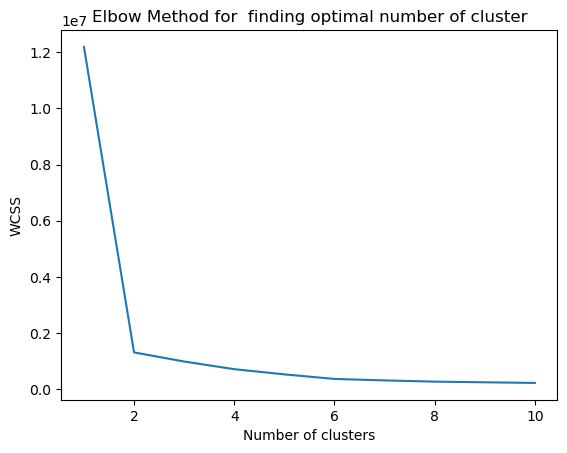

In [31]:
#elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for  finding optimal number of cluster')

# now optimal clusters are 2 from plot

In [39]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df) #calculating cluster centers
y_pred = kmeans.predict(df) # calculating the distance from cluster center to datapoint

C:\Users\nehagour\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [48]:
kmeans.cluster_centers_
#dimension for first cluster(50*8) and second cluster(180*18) as its 2d data

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [64]:
#determine number of datapoints in cluster
pred_df = pd.DataFrame(y_pred.tolist())
pred_df.value_counts()
# in 0th  cluster  3200 datapoint and in first   800


array([0, 0, 0, ..., 1, 1, 1])

In [67]:
df1 =df.drop('cluster number', axis=1)
#df['Cluster number']= y_pred

In [76]:
df1.tail(10)

,mean_dist_day,mean_over_speed_perc,Cluster number
3990,203.80,22,1
3991,167.05,10,1
3992,177.48,19,1
3993,170.22,16,1
3994,209.76,18,1
3995,160.04,10,1
3996,176.17,5,1
3997,170.91,12,1
3998,176.14,5,1
3999,168.03,9,1


In [71]:
#save the model
import joblib 
joblib.dump(kmeans, 'Driver_pred.pkl')
print('Model is saved')

Model is saved
